# Tutorial 5 - CodeGen and External Function Interfacing

- Reference Repo: https://github.com/simbianai/taskgen
- Video: https://www.youtube.com/watch?v=nXA2EbJS8fI

- There are many other existing Agentic Frameworks like Crew.ai, LangChain / LangGraph, LlamaIndex that have many pre-established tools
- AgentJo provides an easy way to interface with them and input them directly into AgentJo Agents!
- We also show how to implement the Code as Actions agent (Executable Code Actions Elicit Better LLM Agents (Wang et al, 2024)
- https://arxiv.org/abs/2402.01030

# Setup Guide

## Step 1: Install AgentJo

In [1]:
# !pip install agentjo

## Step 2: Import required functions and setup relevant API keys for your LLM

In [2]:
# Set up API key and do the necessary imports
from agentjo import *
import os

# this is only if you use OpenAI as your LLM
# os.environ['OPENAI_API_KEY'] = '<YOUR API KEY HERE>'

## Step 3: Define your own LLM
- Take in a `system_prompt`, `user_prompt`, and outputs llm response string

In [3]:
def llm(system_prompt: str, user_prompt: str) -> str:
    ''' Here, we use OpenAI for illustration, you can change it to your own LLM '''
    # ensure your LLM imports are all within this function
    from openai import OpenAI
    
    # define your own LLM here
    client = OpenAI()
    response = client.chat.completions.create(
        model='gpt-4o-mini',
        temperature = 0,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    return response.choices[0].message.content

In [4]:
# Verify that llm function is working
llm(system_prompt = 'You are a classifier to classify the sentiment of a sentence', 
    user_prompt = 'It is a hot and sunny day')

'Neutral'

# CrewAI Structured Tools Interface with AgentJo

In [5]:
# !pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

In [6]:
def query_pdf_tool(query: str):
    ''' Returns the answer to the query '''
    from crewai_tools import PDFSearchTool
    file_path = 'react.pdf'
    
    return PDFSearchTool(pdf=file_path).run(query)

In [7]:
!wget https://arxiv.org/pdf/2210.03629 -O react.pdf

--2024-10-20 15:12:41--  https://arxiv.org/pdf/2210.03629
Resolving arxiv.org (arxiv.org)... 151.101.3.42, 151.101.131.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.3.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 633805 (619K) [application/pdf]
Saving to: ‘react.pdf’

react.pdf           100%[===================>] 618.95K  --.-KB/s    in 0.03s   

2024-10-20 15:12:41 (24.1 MB/s) - ‘react.pdf’ saved [633805/633805]



In [8]:
query_pdf_tool('What is ReAct?')

Inserting batches in chromadb: 100%|██████████████| 2/2 [00:03<00:00,  1.64s/it]


Using Tool: Search a PDF's content


'Relevant Content:\nReAct-IM is in\n\nand gather additional information from external sources such as knowledge bases or environments. We apply our approach, named ReAct , to a diverse set of language and decision making tasks and demonstrate its effectiveness over state-of-the-art baselines in addition to improved human interpretability and trustworthiness. Concretely, on question answering (HotpotQA) and fact veriﬁcation (Fever), ReAct overcomes prevalent issues of hallucination and error propagation in chain-of-thought reasoning by interacting with a simple Wikipedia API, and generating human-like task-solving trajectories that are more interpretable than baselines without reasoning traces. Furthermore, on two interactive decision making benchmarks (ALFWorld and WebShop), ReAct outperforms imitation and reinforcement learning methods by an absolute success rate of 34% and 10% respectively, while being prompted with only one or two in-context examples. 1 I NTRODUCTION A unique featur

In [9]:
agent = Agent('PDF Query Agent', 
              '''Returns the answer to the query''',
              llm = llm).assign_functions([query_pdf_tool])

In [10]:
agent.print_functions()

Name: use_llm
Description: For general tasks. Used only when no other function can do the task
Input: []
Output: {'Output': 'Output of LLM'}

Name: end_task
Description: Passes the final output to the user
Input: []
Output: {}

Name: query_pdf_tool
Description:  Returns the answer to the <query: str> 
Input: ['query']
Output: {}



In [11]:
agent.reset()
agent.run('What is ReAct?')

Observation: No subtasks have been completed yet for the assigned task of defining ReAct.
Thoughts: To complete the assigned task, I need to formulate a query that will provide a clear and concise answer regarding what ReAct is.
Subtask identified: Use the query_pdf_tool to ask about the definition of ReAct.
Calling function query_pdf_tool with parameters {'query': 'What is ReAct?'}
Using Tool: Search a PDF's content
> {'output_1': 'Relevant Content:\nReAct-IM is in\n\nand gather additional information from external sources such as knowledge bases or environments. We apply our approach, named ReAct , to a diverse set of language and decision making tasks and demonstrate its effectiveness over state-of-the-art baselines in addition to improved human interpretability and trustworthiness. Concretely, on question answering (HotpotQA) and fact veriﬁcation (Fever), ReAct overcomes prevalent issues of hallucination and error propagation in chain-of-thought reasoning by interacting with a simp

[{'output_1': 'Relevant Content:\nReAct-IM is in\n\nand gather additional information from external sources such as knowledge bases or environments. We apply our approach, named ReAct , to a diverse set of language and decision making tasks and demonstrate its effectiveness over state-of-the-art baselines in addition to improved human interpretability and trustworthiness. Concretely, on question answering (HotpotQA) and fact veriﬁcation (Fever), ReAct overcomes prevalent issues of hallucination and error propagation in chain-of-thought reasoning by interacting with a simple Wikipedia API, and generating human-like task-solving trajectories that are more interpretable than baselines without reasoning traces. Furthermore, on two interactive decision making benchmarks (ALFWorld and WebShop), ReAct outperforms imitation and reinforcement learning methods by an absolute success rate of 34% and 10% respectively, while being prompted with only one or two in-context examples. 1 I NTRODUCTION A

In [12]:
agent.reply_user()

ReAct-IM is a framework that integrates reasoning and decision-making capabilities into a large language model. It is designed to address prevalent issues in tasks such as question answering and fact verification by interacting with external sources like a simple Wikipedia API. ReAct demonstrates its effectiveness over state-of-the-art baselines, improving human interpretability and trustworthiness. Specifically, in question answering tasks like HotpotQA and fact verification tasks like Fever, ReAct mitigates issues of hallucination and error propagation in chain-of-thought reasoning. It generates human-like task-solving trajectories that are more interpretable than those produced by baselines lacking reasoning traces. Additionally, in interactive decision-making benchmarks such as ALFWorld and WebShop, ReAct outperforms imitation and reinforcement learning methods, achieving absolute success rates of 34% and 10% respectively, even when prompted with only one or two in-context examples

'ReAct-IM is a framework that integrates reasoning and decision-making capabilities into a large language model. It is designed to address prevalent issues in tasks such as question answering and fact verification by interacting with external sources like a simple Wikipedia API. ReAct demonstrates its effectiveness over state-of-the-art baselines, improving human interpretability and trustworthiness. Specifically, in question answering tasks like HotpotQA and fact verification tasks like Fever, ReAct mitigates issues of hallucination and error propagation in chain-of-thought reasoning. It generates human-like task-solving trajectories that are more interpretable than those produced by baselines lacking reasoning traces. Additionally, in interactive decision-making benchmarks such as ALFWorld and WebShop, ReAct outperforms imitation and reinforcement learning methods, achieving absolute success rates of 34% and 10% respectively, even when prompted with only one or two in-context example

In [13]:
# just wrap the external tool within a function
def scrape_website_tool(website_url: str) -> str:
    ''' Scrapes data from a website_url '''
    # import the tool
    from crewai_tools import ScrapeWebsiteTool
    
    # initialise the tool
    docs_scrape_tool = ScrapeWebsiteTool(
        website_url=website_url)
    
    # run the tool
    return docs_scrape_tool.run()

In [14]:
agent = Agent('Website summariser', 
              'Scrapes websites and summarises the findings to the user', 
              summarise_subtasks_count = 5, # this summarises the subtasks after a certain number of subtasks to reduce context length
              llm = llm).assign_functions([scrape_website_tool])

In [15]:
agent.print_functions()

Name: use_llm
Description: For general tasks. Used only when no other function can do the task
Input: []
Output: {'Output': 'Output of LLM'}

Name: end_task
Description: Passes the final output to the user
Input: []
Output: {}

Name: scrape_website_tool
Description:  Scrapes data from a <website_url: str> 
Input: ['website_url']
Output: {'output_1': 'str'}



In [16]:
agent.reset()
agent.run('What are the differences between TaskGen ("https://github.com/simbianai/taskgen") and CrewAI ("https://github.com/joaomdmoura/CrewAI")?')

Observation: No subtasks have been completed yet, and I need to gather information from both TaskGen and CrewAI websites to compare their differences.
Thoughts: I should scrape the content from both websites to extract relevant information that highlights the differences between TaskGen and CrewAI. Once I have the data, I can summarize the findings.
Subtask identified: Scrape the data from the TaskGen website to gather information about its features and functionalities.
Calling function scrape_website_tool with parameters {'website_url': 'https://github.com/simbianai/taskgen'}
Using Tool: Read website content
> {'output_1': 'GitHub - simbianai/taskgen: Task-based Agentic Framework using StrictJSON as the core\nSkip to content\nNavigation Menu\nToggle navigation\n Sign in\n Product\nGitHub Copilot\n Write better code with AI\nSecurity\n Find and fix vulnerabilities\nActions\n Automate any workflow\nCodespaces\n Instant dev environments\nIssues\n Plan and track work\nCode Review\n Manage

[{'output_1': 'GitHub - simbianai/taskgen: Task-based Agentic Framework using StrictJSON as the core\nSkip to content\nNavigation Menu\nToggle navigation\n Sign in\n Product\nGitHub Copilot\n Write better code with AI\nSecurity\n Find and fix vulnerabilities\nActions\n Automate any workflow\nCodespaces\n Instant dev environments\nIssues\n Plan and track work\nCode Review\n Manage code changes\nDiscussions\n Collaborate outside of code\nCode Search\n Find more, search less\nExplore\n All features\n Documentation\n GitHub Skills\n Blog\n Solutions\nBy company size\n Enterprises\n Small and medium teams\n Startups\nBy use case\n DevSecOps\n DevOps\n CI/CD\n View all use cases\nBy industry\n Healthcare\n Financial services\n Manufacturing\n Government\n View all industries\n View all solutions\n Resources\nTopics\n AI\n DevOps\n Security\n Software Development\n View all\nExplore\n Learning Pathways\n White papers, Ebooks, Webinars\n Customer Stories\n Partners\n Open Source\nGitHub Sponso

In [17]:
agent.reply_user('What are the key imports needed?')

The key imports needed for both TaskGen and CrewAI frameworks are as follows:

1. **For TaskGen**:
   - The framework utilizes StrictJSON, which is essential for its core functionality. Therefore, the import statement would typically include:
     ```python
     from strictjson import StrictJSON
     ```
   - Additionally, if you are using the TaskGen library, you would need to import the main components of the library, which may look like:
     ```python
     from taskgen import Agent, Function, AsyncFunction
     ```
   - If you are working with Jupyter Notebooks, you might also need:
     ```python
     import notebook
     ```

2. **For CrewAI**:
   - The CrewAI framework requires imports for its core components, which include:
     ```python
     from crewai import Agent, Crew, Process, Task
     from crewai.project import CrewBase, agent, crew, task
     from crewai_tools import SerperDevTool
     ```
   - If you are using YAML configurations, you may also need:
     ```python
  

'The key imports needed for both TaskGen and CrewAI frameworks are as follows:\n\n1. **For TaskGen**:\n   - The framework utilizes StrictJSON, which is essential for its core functionality. Therefore, the import statement would typically include:\n     ```python\n     from strictjson import StrictJSON\n     ```\n   - Additionally, if you are using the TaskGen library, you would need to import the main components of the library, which may look like:\n     ```python\n     from taskgen import Agent, Function, AsyncFunction\n     ```\n   - If you are working with Jupyter Notebooks, you might also need:\n     ```python\n     import notebook\n     ```\n\n2. **For CrewAI**:\n   - The CrewAI framework requires imports for its core components, which include:\n     ```python\n     from crewai import Agent, Crew, Process, Task\n     from crewai.project import CrewBase, agent, crew, task\n     from crewai_tools import SerperDevTool\n     ```\n   - If you are using YAML configurations, you may also

In [18]:
agent.reply_user('What version of packages are they compatible with?')

The compatibility of packages for both TaskGen and CrewAI is as follows:

1. **TaskGen**:
   - TaskGen is compatible with Python versions >=3.8 and <=3.10. It is important to ensure that the correct version of Python is installed to avoid compatibility issues.
   - The specific version of TaskGen mentioned is 3.3.4, which can be installed using the command:
     ```bash
     pip install taskgen-ai==3.3.4
     ```
   - TaskGen also requires the use of StrictJSON, which is integral to its functionality.

2. **CrewAI**:
   - CrewAI requires Python versions >=3.10 and <=3.13. This version range is crucial for the proper functioning of the framework.
   - To install CrewAI, the command is:
     ```bash
     pip install crewai
     ```
   - For additional features, the command to install CrewAI with optional tools is:
     ```bash
     pip install 'crewai[tools]'
     ```
   - CrewAI uses UV for dependency management and package handling, which also needs to be compatible with the specified 

"The compatibility of packages for both TaskGen and CrewAI is as follows:\n\n1. **TaskGen**:\n   - TaskGen is compatible with Python versions >=3.8 and <=3.10. It is important to ensure that the correct version of Python is installed to avoid compatibility issues.\n   - The specific version of TaskGen mentioned is 3.3.4, which can be installed using the command:\n     ```bash\n     pip install taskgen-ai==3.3.4\n     ```\n   - TaskGen also requires the use of StrictJSON, which is integral to its functionality.\n\n2. **CrewAI**:\n   - CrewAI requires Python versions >=3.10 and <=3.13. This version range is crucial for the proper functioning of the framework.\n   - To install CrewAI, the command is:\n     ```bash\n     pip install crewai\n     ```\n   - For additional features, the command to install CrewAI with optional tools is:\n     ```bash\n     pip install 'crewai[tools]'\n     ```\n   - CrewAI uses UV for dependency management and package handling, which also needs to be compatibl

# LangChain Structured Tools Interface with AgentJo
- If User defines a function in LangChain, simply just add <fn_name>.func to AgentJo Agent

In [19]:
from langchain_core.tools import tool

@tool
def add(num1: int, num2: int) -> int:
    """Adds num1 and num2."""
    return num1 + num2


@tool
def multiply(num1: int, num2: int) -> int:
    """Multiplies num1 and num2."""
    return num1 * num2


tools = [add, multiply]

In [20]:
from agentjo import Agent
agent = Agent('Math Whiz', 'Does calculations',
             llm = llm).assign_functions([add.func, multiply.func])

In [21]:
agent.list_functions()

["Name: use_llm\nDescription: For general tasks. Used only when no other function can do the task\nInput: []\nOutput: {'Output': 'Output of LLM'}\n",
 'Name: end_task\nDescription: Passes the final output to the user\nInput: []\nOutput: {}\n',
 "Name: add\nDescription: Adds <num1: int> and <num2: int>.\nInput: ['num1', 'num2']\nOutput: {'output_1': 'int'}\n",
 "Name: multiply\nDescription: Multiplies <num1: int> and <num2: int>.\nInput: ['num1', 'num2']\nOutput: {'output_1': 'int'}\n"]

In [22]:
agent.run('Calculate 3*5 + 3')

Observation: No subtasks have been completed yet for the assigned task of calculating 3*5 + 3.
Thoughts: To complete the assigned task, I need to first perform the multiplication of 3 and 5, and then add 3 to the result.
Subtask identified: Multiply 3 and 5 to get the first part of the calculation.
Calling function multiply with parameters {'num1': 3, 'num2': 5}
> {'output_1': 15}

Observation: The multiplication of 3 and 5 has been completed, resulting in 15.
Thoughts: Now, I need to add 3 to the result of the multiplication to complete the calculation for the assigned task.
Subtask identified: Add 15 and 3 to get the final result of the assigned task.
Calling function add with parameters {'num1': 15, 'num2': 3}
> {'output_1': 18}

Observation: The multiplication of 3 and 5 has been completed, resulting in 15. Additionally, 15 has been added to 3, yielding a final result of 18.
Thoughts: The Assigned Task has been fully completed as the calculation 3*5 + 3 has been executed, and the f

[{'output_1': 15}, {'output_1': 18}]

# LangChain Community Tools Interface with AgentJo
- See https://python.langchain.com/v0.2/docs/integrations/providers/ for full list
- Wikipedia
- Python REPL (not that great to run many things - have created my own in AgentJo)

In [23]:
# !pip -q install wikipedia

In [24]:
def wikipedia_tool(search_query: str) -> str:
    ''' Uses search_query and returns text from wikipedia '''
    from langchain.tools import WikipediaQueryRun
    from langchain.utilities import WikipediaAPIWrapper

    return WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper()).run(search_query)

In [25]:
wikipedia_tool('Joe Biden')[:100]

'Page: Joe Biden\nSummary: Joseph Robinette Biden Jr. (born November 20, 1942) is an American politici'

In [26]:
def python_repl_tool(python_code: str) -> str:
    ''' Runs python_code, returns the final result, or any debugging errors '''
    from langchain.utilities import PythonREPL
    
    return PythonREPL().run(python_code)

In [27]:
python_repl_tool('print(3+5)')

2024-10-20 15:13:41,958 - 140704336606976 - python.py-python:16 - WARNING: Python REPL can execute arbitrary code. Use with caution.


'8\n'

# LlamaIndex Function Interface with AgentJo
- If User defines a function in LlamaIndex, simply just add <fn_name>.fn to AgentJo Agent
- TODO: Add structure for other kinds of functions in LlamaIndex

In [28]:
# !pip install llama-index

In [29]:
from llama_index.core.tools import FunctionTool

def get_weather(location: str) -> str:
    """Useful for getting the weather for a given location"""
    return 'Sunny'
    ...

tool = FunctionTool.from_defaults(
    get_weather,
    # async_fn=aget_weather,  # optional!
)

In [30]:
agent = Agent('Weather Agent', 'Returns the Weather',
             llm = llm).assign_functions(tool.fn)

In [31]:
agent.list_functions()

["Name: use_llm\nDescription: For general tasks. Used only when no other function can do the task\nInput: []\nOutput: {'Output': 'Output of LLM'}\n",
 'Name: end_task\nDescription: Passes the final output to the user\nInput: []\nOutput: {}\n',
 "Name: get_weather\nDescription: Useful for getting the weather for a given <location: str>\nInput: ['location']\nOutput: {'output_1': 'str'}\n"]

In [32]:
agent.run('What is the weather in Miami?')

Observation: No subtasks have been completed yet for the assigned task of retrieving the weather in Miami.
Thoughts: To complete the assigned task, I need to use the get_weather function to obtain the weather information for Miami.
Subtask identified: Use the get_weather function to retrieve the current weather for Miami.
Calling function get_weather with parameters {'location': 'Miami'}
> {'output_1': 'Sunny'}

Observation: The weather in Miami has been retrieved and is reported as Sunny.
Thoughts: Since the weather information has been successfully obtained, the next step is to provide this information to the user.
Subtask identified: End Task
Task completed successfully!



[{'output_1': 'Sunny'}]

# AgentJo Custom Tools
- Some initial tools AgentJo can provide are as follows:
    - Code generator: `python_generator_tool`
    - Code executor: `python_run_tool`
    - Code debugger: `python_debug_tool`
    - Code generator, executor and debugger combined: `python_generate_and_run_code_tool`

In [33]:
shared_variables = {'agent': Agent('Generalist Agent', 'Does Everything', llm = llm).assign_functions([wikipedia_tool])}

In [34]:
def python_generator_tool(shared_variables, instruction: str):
    '''Generate code only based on instruction without any additional context.
Ensure that you define all variables and list out all imports.
You can only import the following modules: math, numpy, random, datetime, re, matplotlib, pandas, plotly
Do not define any new functions
You are able to use all Equipped Functions except use_llm and end_task
The output of Equipped Function will be in a dictionary format
Ensure all required output are in print()'''
    
    agent = shared_variables['agent']
    
    return strict_json(f'''Generate code based only on ```{instruction}``` without additional context.
Ensure that you define all variables and list out all imports.
You can only import the following modules: math, numpy, random, datetime, re, matplotlib, pandas, plotly
Do not define any new functions
You are able to use the following Equipped Functions: 
```{agent.list_functions(
fn_list = [agent.function_map[function_name] for function_name in agent.function_map if function_name not in ['use_llm', 'end_task']])}
```
The output of Equipped Function will be in a dictionary format
You must use Equipped Functions whenever possible
Ensure all required output are in print()''',
                       '',
                                     output_format = {'Generated Code': 'type: code'},
                      llm = agent.llm)

In [35]:
python_generator_tool(shared_variables, 'What are the first 3 primes by calculation?')

Filtered Function Names: wikipedia_tool


{'Generated Code': 'import math\n\n# Initialize variables\nprimes = []\nnum = 2\n\n# Calculate the first 3 prime numbers\nwhile len(primes) < 3:\n    is_prime = True\n    for i in range(2, int(math.sqrt(num)) + 1):\n        if num % i == 0:\n            is_prime = False\n            break\n    if is_prime:\n        primes.append(num)\n    num += 1\n\n# Output the first 3 primes\nprint(primes)'}

In [36]:
def python_run_tool(shared_variables, code_snippet: str) -> str:
    '''Runs code_snippet and outputs the result of all print statements'''
    import sys
    import io
    import math
    import numpy
    import random
    import datetime
    import re
    import matplotlib
    import pandas
    import plotly
    
    agent = shared_variables['agent']
    
    # wrap external functions to pass in shared_variables as well
    def external_function_wrapper(function_name, shared_variables):
        def external_function(**function_params):
            return agent.function_map[function_name](shared_variables=shared_variables, **function_params)
        return external_function
    
    # Capture the output
    old_stdout = sys.stdout
    sys.stdout = io.StringIO()

    try:
        # Safe environment to execute the user code
        allowed_globals = {
            '__builtins__': {
                'print': print,
                'range': range,
                'len': len,
                'int': int,
                'float': float,
                'str': str,
                'list': list,
                'dict': dict,
                'set': set,
                'tuple': tuple,
                'abs': abs,
                'min': min,
                'max': max,
                'sum': sum,
                'any': any,
                'all': all,
                'sorted': sorted,
                'zip': zip,
                'map': map,
                'filter': filter,
                '__import__': __import__,
                'math': math,  # Allow access to the math module
                'datetime': datetime, # Allow access to datetime module
                'random': random, # Allow access to random module
                'numpy': numpy, # Allow access to numpy module
                're': re,
                'matplotlib': matplotlib,
                'pandas': pandas,
                'plotly': plotly
            }
        }
        
        # add in equipped functions one by one
        for function_name in agent.function_map:
            if function_name not in ['use_llm', 'end_task', 'python_generate_and_run_code_tool']:
                allowed_globals['__builtins__'][function_name] = external_function_wrapper(function_name, shared_variables)

        safe_locals = {}

        exec(code_snippet, allowed_globals, safe_locals)
        output = sys.stdout.getvalue()
    except Exception as e:
        output = f"Error: {e}"
    finally:
        # Restore the original stdout
        sys.stdout = old_stdout

    return output

In [37]:
python_run_tool({'agent': Agent('Generalist Agent', 'Does Everything', llm = llm)},
                 'print("This is a great tool to debug and run code!")\nprint("Awesome!")')

'This is a great tool to debug and run code!\nAwesome!\n'

In [38]:
python_debug_tool = Function('''Debugs Python Code and returns corrected code.
Instruction: <instruction: str>
Current Code: <python_code: str>
Error Message: <error_msg: str>''',
                                 output_format = {'Thoughts': 'How to correct code', 'Corrected Code': 'type: code'}, 
                             fn_name = 'python_debug_tool', 
                             llm = llm)

In [39]:
python_debug_tool('Print result', 'result = 3print(result)', 'invalid decimal literal (<string>, line 1)')

{'Thoughts': 'The code has a syntax error due to the incorrect placement of the number and the print function. It should assign a value to result and then print it.',
 'Corrected Code': 'result = 3\nprint(result)'}

## Combining all Python Code tools into one
- This is like a rule-based agent, doing the three functions inside it, so that we don't have to keep passing in code as input variable to the functions
- This is also a context-based function, taking in agent's overall task and subtasks completed via shared_variables

In [40]:
# Uses LLM to generate Code
def python_generate_and_run_code(shared_variables, instruction: str) -> str:
    ''' Generates and runs code based on instruction. 
You can only import the following modules: math, numpy, random, datetime, re, matplotlib, pandas, plotly
You can use all Equipped Functions except use_llm and end_task. 
Returns 1) the result of all print statements in code, or error messages, and 2) the code '''
    # from termcolor import colored
    
    # Append context to tool
    if shared_variables and 'agent' in shared_variables:
        instruction = f"Context: {shared_variables['agent'].overall_task}\nPrevious Subtasks: {shared_variables['agent'].subtasks_completed}\nInstruction: {instruction}"
    # Generate Code
    python_code = python_generator_tool(shared_variables, instruction)['Generated Code']
    # print(colored(f'Generated code: ```{python_code}```', 'magenta'))
    
    # Run and Debug Code
    for _ in range(3):
        output = python_run_tool(shared_variables, python_code)

        if output[:5] == "Error":
            debugged_code = python_debug_tool(instruction, python_code, output)
            python_code = debugged_code['Corrected Code']
            # print(colored(output, 'red'))
            # print(colored(f'Debugged code: ```{python_code}```', 'magenta'))
        else:
            break
            
    return output, python_code

# Make this function compulsory
python_generate_and_run_code_tool = Function(
    external_fn = python_generate_and_run_code, 
    fn_name = 'python_generate_and_run_code_tool', 
    is_compulsory = True)

In [42]:
python_generate_and_run_code_tool(shared_variables = shared_variables, instruction = 'Give me first 10 primes, without 2 and 5')

Filtered Function Names: wikipedia_tool


{'output_1': '[3, 5, 7, 11, 13, 17, 19, 23, 29, 31]\n',
 'output_2': 'import math\n\nprimes = []\nnum = 3\nwhile len(primes) < 10:\n    is_prime = True\n    for i in range(3, int(math.sqrt(num)) + 1, 2):\n        if num % i == 0:\n            is_prime = False\n            break\n    if is_prime:\n        primes.append(num)\n    num += 2\n\nprint(primes)'}

# General CodeGen showcase

In [43]:
agent = Agent('Generalist Agent', 
'''Helps user with tasks. When deterministic output or plots are needed, generate and run code. Do not use LLM for calculations.''',
             summarise_subtasks_count = 10,
             llm = llm).assign_functions(
    [wikipedia_tool, python_generate_and_run_code_tool])

In [44]:
agent.reset()
agent.run('John has 5 apples. John received another 21 more from Mary, and gave 10 to Tim. How many apples does John have at the end?')

Observation: No subtasks have been completed yet, and the task requires a calculation to determine how many apples John has after receiving and giving away some.
Thoughts: To complete the task, I need to perform a calculation based on the initial number of apples, the apples received, and the apples given away. I can generate and run code to perform this calculation accurately.
Subtask identified: Generate and run code to calculate the final number of apples John has after receiving 21 apples and giving away 10 apples.
Calling function python_generate_and_run_code_tool with parameters {'instruction': 'Generate and run code to calculate the final number of apples John has after receiving 21 apples and giving away 10 apples.'}
Filtered Function Names: wikipedia_tool, python_generate_and_run_code_tool
> {'output_1': '16\n', 'output_2': 'import numpy as np\n\n# Initial number of apples\njohn_apples = 5\n\n# Apples received from Mary\nreceived_apples = 21\n\n# Apples given to Tim\ngiven_app

[{'output_1': '16\n',
  'output_2': 'import numpy as np\n\n# Initial number of apples\njohn_apples = 5\n\n# Apples received from Mary\nreceived_apples = 21\n\n# Apples given to Tim\ngiven_apples = 10\n\n# Calculate final number of apples\nfinal_apples = john_apples + received_apples - given_apples\n\nprint(final_apples)'}]

In [45]:
agent.reply_user()

To determine how many apples John has at the end, we start with the initial number of apples he has, which is 5. John then receives 21 apples from Mary, bringing his total to 5 + 21 = 26 apples. After that, John gives away 10 apples to Tim. Therefore, the final calculation is 26 - 10 = 16 apples. 

The code that was generated and run to calculate this is as follows:

```python
import numpy as np

# Initial number of apples
john_apples = 5

# Apples received from Mary
received_apples = 21

# Apples given to Tim
given_apples = 10

# Calculate final number of apples
final_apples = john_apples + received_apples - given_apples

print(final_apples)
```

The output of this code confirms that John has 16 apples at the end.


'To determine how many apples John has at the end, we start with the initial number of apples he has, which is 5. John then receives 21 apples from Mary, bringing his total to 5 + 21 = 26 apples. After that, John gives away 10 apples to Tim. Therefore, the final calculation is 26 - 10 = 16 apples. \n\nThe code that was generated and run to calculate this is as follows:\n\n```python\nimport numpy as np\n\n# Initial number of apples\njohn_apples = 5\n\n# Apples received from Mary\nreceived_apples = 21\n\n# Apples given to Tim\ngiven_apples = 10\n\n# Calculate final number of apples\nfinal_apples = john_apples + received_apples - given_apples\n\nprint(final_apples)\n```\n\nThe output of this code confirms that John has 16 apples at the end.'

Observation: No subtasks have been completed yet for the task of plotting the graph of y = 2x^2.
Thoughts: To complete the task, I need to generate code that will create a plot for the equation y = 2x^2. This involves defining the range of x values, calculating the corresponding y values, and then using a plotting library to visualize the graph.
Subtask identified: Generate and run code to plot the graph of the equation y = 2x^2 using a suitable plotting library.
Calling function python_generate_and_run_code_tool with parameters {'instruction': 'Generate and run code to plot the graph of the equation y = 2x^2 using a suitable plotting library.'}
Filtered Function Names: wikipedia_tool, python_generate_and_run_code_tool


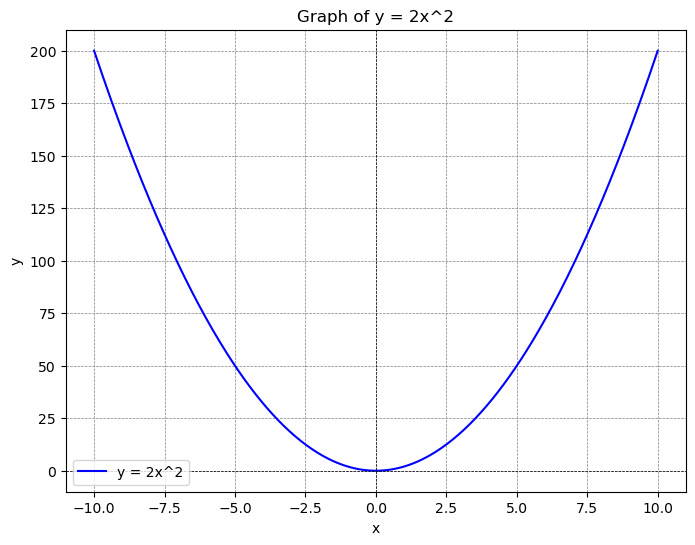

> {'output_1': '', 'output_2': 'import numpy as np\nimport matplotlib.pyplot as plt\n\n# Define the range of x values\nx = np.linspace(-10, 10, 400)\n# Define the equation y = 2x^2\ny = 2 * x**2\n\n# Create the plot\nplt.figure(figsize=(8, 6))\nplt.plot(x, y, label="y = 2x^2", color="blue")\nplt.title("Graph of y = 2x^2")\nplt.xlabel("x")\nplt.ylabel("y")\nplt.axhline(0, color=\'black\',linewidth=0.5, ls=\'--\')\nplt.axvline(0, color=\'black\',linewidth=0.5, ls=\'--\')\nplt.grid(color = \'gray\', linestyle = \'--\', linewidth = 0.5)\nplt.legend()\nplt.show()'}

Observation: The code to plot the graph of y = 2x^2 has been generated and run successfully, but the output of the plot has not been displayed to the user yet.
Thoughts: To complete the assigned task, I need to ensure that the final output, which is the plot of the graph, is passed to the user.
Subtask identified: End Task
Task completed successfully!



[{'output_1': '',
  'output_2': 'import numpy as np\nimport matplotlib.pyplot as plt\n\n# Define the range of x values\nx = np.linspace(-10, 10, 400)\n# Define the equation y = 2x^2\ny = 2 * x**2\n\n# Create the plot\nplt.figure(figsize=(8, 6))\nplt.plot(x, y, label="y = 2x^2", color="blue")\nplt.title("Graph of y = 2x^2")\nplt.xlabel("x")\nplt.ylabel("y")\nplt.axhline(0, color=\'black\',linewidth=0.5, ls=\'--\')\nplt.axvline(0, color=\'black\',linewidth=0.5, ls=\'--\')\nplt.grid(color = \'gray\', linestyle = \'--\', linewidth = 0.5)\nplt.legend()\nplt.show()'}]

In [46]:
agent.reset()
agent.run('Plot me a graph of y = 2x^2')

In [47]:
agent.reset()
agent.run('What are the first 10 prime numbers?')

Observation: No subtasks have been completed yet for the task of identifying the first 10 prime numbers.
Thoughts: To complete the task, I need to generate a list of the first 10 prime numbers. This can be done by writing a simple algorithm to find prime numbers and then running that code.
Subtask identified: Generate and run code to calculate the first 10 prime numbers.
Calling function python_generate_and_run_code_tool with parameters {'instruction': 'Generate and run code to calculate the first 10 prime numbers.'}
Filtered Function Names: wikipedia_tool, python_generate_and_run_code_tool
> {'output_1': '[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]\n', 'output_2': 'import math\n\n# Function to check if a number is prime\nis_prime = lambda n: n > 1 and all(n % i != 0 for i in range(2, int(math.sqrt(n)) + 1))\n\n# List to hold the first 10 prime numbers\nprimes = []\n\n# Start checking numbers from 2\nnum = 2\nwhile len(primes) < 10:\n    if is_prime(num):\n        primes.append(num)\n    num 

[{'output_1': '[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]\n',
  'output_2': 'import math\n\n# Function to check if a number is prime\nis_prime = lambda n: n > 1 and all(n % i != 0 for i in range(2, int(math.sqrt(n)) + 1))\n\n# List to hold the first 10 prime numbers\nprimes = []\n\n# Start checking numbers from 2\nnum = 2\nwhile len(primes) < 10:\n    if is_prime(num):\n        primes.append(num)\n    num += 1\n\nprint(primes)'}]

In [48]:
agent.reset()
agent.run('Who is Joe Biden and how old is he now based on calculation?')

Observation: No subtasks have been completed yet for the task of finding out who Joe Biden is and calculating his current age.
Thoughts: To complete the task, I need to gather information about Joe Biden and perform a calculation to determine his current age based on the current date.
Subtask identified: First, I will search for information about Joe Biden using the Wikipedia tool to gather relevant details about his background and current status.
Calling function wikipedia_tool with parameters {'search_query': 'Joe Biden'}
> {'output_1': "Page: Joe Biden\nSummary: Joseph Robinette Biden Jr. (born November 20, 1942) is an American politician who has been the 46th and current president of the United States since 2021. A member of the Democratic Party, he served as the 47th vice president from 2009 to 2017 under President Barack Obama and represented Delaware in the U.S. Senate from 1973 to 2009.\nBorn in Scranton, Pennsylvania, Biden moved with his family to Delaware in 1953. He graduat

[{'output_1': "Page: Joe Biden\nSummary: Joseph Robinette Biden Jr. (born November 20, 1942) is an American politician who has been the 46th and current president of the United States since 2021. A member of the Democratic Party, he served as the 47th vice president from 2009 to 2017 under President Barack Obama and represented Delaware in the U.S. Senate from 1973 to 2009.\nBorn in Scranton, Pennsylvania, Biden moved with his family to Delaware in 1953. He graduated from the University of Delaware in 1965 and the Syracuse University College of Law in 1968. He was elected to the New Castle County Council in 1970 and the U.S. Senate in 1972. As a senator, Biden drafted and led the effort to pass the Violent Crime Control and Law Enforcement Act and the Violence Against Women Act. He also oversaw six U.S. Supreme Court confirmation hearings, including the contentious hearings for Robert Bork and Clarence Thomas. Biden ran unsuccessfully for the 1988 and 2008 Democratic presidential nomin

In [49]:
agent.reply_user()

Joe Biden, whose full name is Joseph Robinette Biden Jr., is an American politician born on November 20, 1942. He is currently the 46th and current president of the United States, having taken office on January 20, 2021. Biden is a member of the Democratic Party and previously served as the 47th vice president from 2009 to 2017 under President Barack Obama. He represented Delaware in the U.S. Senate from 1973 to 2009. Biden became the oldest president in U.S. history when he was inaugurated, and he is currently 81 years old.


'Joe Biden, whose full name is Joseph Robinette Biden Jr., is an American politician born on November 20, 1942. He is currently the 46th and current president of the United States, having taken office on January 20, 2021. Biden is a member of the Democratic Party and previously served as the 47th vice president from 2009 to 2017 under President Barack Obama. He represented Delaware in the U.S. Senate from 1973 to 2009. Biden became the oldest president in U.S. history when he was inaugurated, and he is currently 81 years old.'

In [50]:
agent.reply_user('Reply only the age')

Joe Biden is currently 81 years old. He was born on November 20, 1942, and became the 46th president of the United States on January 20, 2021.


'Joe Biden is currently 81 years old. He was born on November 20, 1942, and became the 46th president of the United States on January 20, 2021.'

# Code as Action
- Executable Code Actions Elicit Better LLM Agents (Wang et al, 2024)
- https://arxiv.org/abs/2402.01030

- **How to use it**: Equip `python_generate_and_run_code_tool` and set `code_action = True` to make this function be used as default other than `end_task`. Also mention to use `python_generate_and_run_code_tool` as default in the Agent prompt.

- My take:
    - It is not as robust as the way we do modular function calling like the rest of AgentJo
    - Should use better LLMs like `gpt-4o-mini` to be viable
    - Try to specify 'at one go' in the task to encourage LLM to use all Equipped Functions in the same code

In [55]:
def return_random_person() -> str:
    '''Returns a random person name'''
    import numpy as np
    return np.random.choice(['Alice', 'Bob', 'Cindy', 'Don', 'Edward'])

In [56]:
agent = Agent('Code Agent', 
'''Uses code to solve tasks''',
              code_action = True, # this forces python_generate_and_run_code_tool to be the default action
             summarise_subtasks_count = 10,
             llm = llm).assign_functions(
    [python_generate_and_run_code_tool, return_random_person])

In [57]:
agent.reset()
agent.run('Generate three random names in one go. Ensure names are unique.')

Observation: No subtasks have been completed yet, and the task requires generating three unique random names.
Thoughts: To complete the task, I need to generate three unique random names. I can use the return_random_person function to generate names, ensuring that they are unique by checking against previously generated names.
Subtask identified: Generate a random name using the return_random_person function and store it. Repeat this process until three unique names are generated.
Calling function python_generate_and_run_code_tool with parameters {'instruction': 'Generate a random name using the return_random_person function and store it. Repeat this process until three unique names are generated.'}
Filtered Function Names: python_generate_and_run_code_tool, return_random_person
> {'output_1': 'Cindy\nDon\nAlice\n', 'output_2': 'import random\n\nunique_names = set()\n\nwhile len(unique_names) < 3:\n    name = return_random_person()\n    unique_names.add(name["output_1"])  \n\nfor name 

[{'output_1': 'Cindy\nDon\nAlice\n',
  'output_2': 'import random\n\nunique_names = set()\n\nwhile len(unique_names) < 3:\n    name = return_random_person()\n    unique_names.add(name["output_1"])  \n\nfor name in unique_names:\n    print(name)'}]

In [58]:
agent.reply_user('Reply only the three names')

The three unique names generated are: Cindy, Don, and Alice.


'The three unique names generated are: Cindy, Don, and Alice.'